## **DBSCAN**

In [10]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

#  etiquetas de todas las instancias (-1 considered anomalies)
dbscan.labels_[:10]


array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5], dtype=int64)

Los índices de las instancias del núcleo están disponibles en la variable de instancia
*core_sample_indices_*

In [4]:
dbscan.core_sample_indices_[:10]

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13], dtype=int64)

In [13]:
# copia de los datos con los que se realiza el entrenamiento 
dbscan.components_[0]

array([-0.02137124,  0.40618608])

In [14]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(eps=0.2)

In [15]:
from matplotlib import pyplot as plt
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)


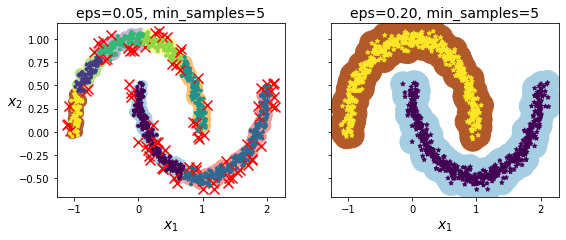

In [16]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()


 Como puede verse, identificó bastantes anomalías, además de siete
agrupaciones diferentes. Como puede ver, identificó bastantes anomalías,
además de siete conglomerados diferentes. ¡Qué decepción!
Afortunadamente, si ampliamos la vecindad de cada instancia
aumentando eps a 0,2, obtenemos la agrupación de la derecha, que
parece perfecta

La clase **DBSCAN** no tiene un método predict(), aunque
tiene un método fit_predict(). En otras palabras, no puede predecir a
qué cluster pertenece una nueva instancia. Esta decisión de
implementación se tomó porque diferentes algoritmos de clasificación
pueden ser mejores para diferentes tareas, por lo que los autores
decidieron dejar que el usuario elija cuál utilizar.

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan2.components_, dbscan2.labels_)

KNeighborsClassifier(n_neighbors=50)

In [42]:
import numpy as np
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0], dtype=int64)

In [43]:
knn.predict_proba(X_new)

array([[0.18, 0.82],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

 Es bastante sencillo introducir una distancia máxima, en cuyo caso
las dos instancias que están lejos de ambos clusters se clasifican como
anomalías. Para ello, utilice el método kneighbors() del KNeighborsClassifier.
Dado un conjunto de instancias, devuelve las distancias y los índices de
los k vecinos más cercanos en el conjunto de entrenamiento (dos matrices,
cada una con k columnas)

In [45]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0, -1, -1], dtype=int64)